In [22]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown

from src.load_data import DataLoaderFactory
from src.plot_data_basic import Plotter, PlotStrategy
from src.plot_data_basic import PlotAverageSessionTimes, PlotNumberOfSessions, PlotUserFrequencyDistribution
from src.plot_data_univariate import PlotCategoricalDistribution, PlotNumericalDistribution
from src.plot_data_bivariate import PlotNumericalVsNumericalScatter, PlotCorrHeatmap, PlotCategoricalVsNumericalBox

from src.eda_tools import plot_bivariate_plots, plot_univariate_plots
from src.plot_tools import add_enriched_datetime_columns, get_daily_session_stats
from src.utils import setup_logger

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

plotter = Plotter(PlotStrategy)

dataset_id = "ACN_Office001"

setup_logger(os.path.join("log",f"{dataset_id.lower()}.log"), level="INFO")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Load the data
loader = DataLoaderFactory.get_loader(
        dataset_id,
        force_download=False
    )
df_raw: pd.DataFrame = loader.load()
df_original = add_enriched_datetime_columns(df_raw)
display(df_original.head(5))
display(df_original.tail(5))

print("\nData Types and Non-null Counts:")
print(df_original.info())


2025-08-04 15:37:56,180 | INFO | src.load_data | The dataset 'ACN_Office001' already exists in 'c:\Users\OzceylanB\OneDrive\Projects\ev-charge-eda\data\formatted' and will not be re-downloaded.


,EV_id_x,start_datetime,end_datetime,total_energy,month,day_of_week,day_of_week_enum,duration_minutes,date,start_time,end_time
0,EV0,2019-03-25 09:24:42,2019-03-25 18:32:12,6.146,March,Monday,0,547.500000,2019-03-25,09:24:42,18:32:12
1,EV1,2019-03-25 10:19:27,2019-03-25 17:38:50,3.658,March,Monday,0,439.383333,2019-03-25,10:19:27,17:38:50
2,EV2,2019-03-25 14:27:32,2019-03-25 20:32:03,28.330,March,Monday,0,364.516667,2019-03-25,14:27:32,20:32:03
3,EV3,2019-03-26 11:33:56,2019-03-26 17:45:33,12.978,March,Tuesday,1,371.616667,2019-03-26,11:33:56,17:45:33
4,EV4,2019-03-27 11:28:01,2019-03-27 17:37:47,10.688,March,Wednesday,2,369.766667,2019-03-27,11:28:01,17:37:47


,EV_id_x,start_datetime,end_datetime,total_energy,month,day_of_week,day_of_week_enum,duration_minutes,date,start_time,end_time
1678,EV1094,2021-09-09 14:11:44,2021-09-09 20:47:58,19.342,September,Thursday,3,396.233333,2021-09-09,14:11:44,20:47:58
1679,EV1103,2021-09-10 08:33:08,2021-09-10 16:53:29,33.186,September,Friday,4,500.350000,2021-09-10,08:33:08,16:53:29
1680,EV1094,2021-09-10 14:12:26,2021-09-10 21:25:47,19.894,September,Friday,4,433.350000,2021-09-10,14:12:26,21:25:47
1681,EV1103,2021-09-13 10:35:32,2021-09-13 17:26:25,26.688,September,Monday,0,410.883333,2021-09-13,10:35:32,17:26:25
1682,EV1094,2021-09-13 14:21:51,2021-09-13 20:55:04,18.019,September,Monday,0,393.216667,2021-09-13,14:21:51,20:55:04



Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   EV_id_x           1683 non-null   object        
 1   start_datetime    1683 non-null   datetime64[ns]
 2   end_datetime      1683 non-null   datetime64[ns]
 3   total_energy      1683 non-null   float64       
 4   month             1683 non-null   object        
 5   day_of_week       1683 non-null   object        
 6   day_of_week_enum  1683 non-null   int32         
 7   duration_minutes  1683 non-null   float64       
 8   date              1683 non-null   object        
 9   start_time        1683 non-null   object        
 10  end_time          1683 non-null   object        
dtypes: datetime64[ns](2), float64(2), int32(1), object(6)
memory usage: 138.2+ KB
None


### EV Arrival Patterns

**Number of EV Arrivals per Month**  
   This bar chart displays the monthly counts of EV arrivals across the original dataset.  
   - Activity is highest between **early-2019 and early 2020**, reaching a peak of around **140 sessions per month**.  
   - There is a significant **drop in arrivals after February 2020**, which coincides with the start of the COVID-19 pandemic, followed by a slow recovery into 2021.  

These visualizations provide insight into the temporal patterns of EV charging usage, and pandemic-related decline in activity.


2025-08-04 15:37:56,322 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:37:56,326 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


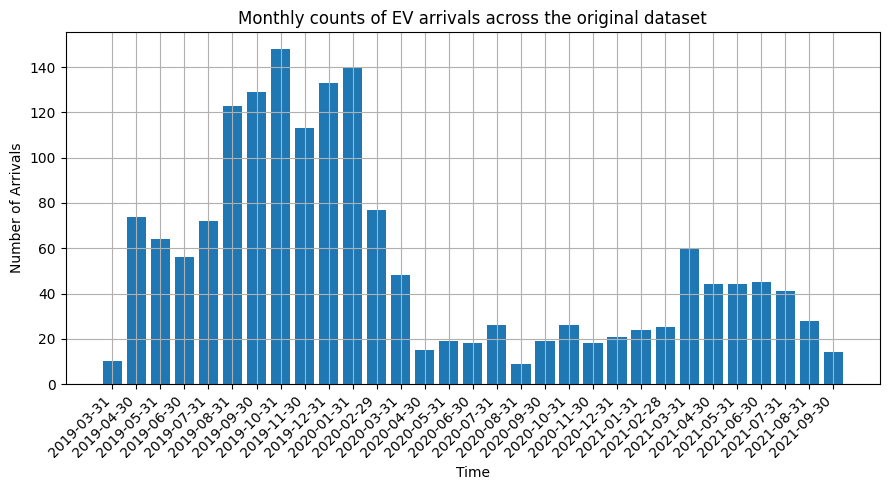

In [24]:
fig, ax = plt.subplots(figsize=(9, 5))
plotter.set_strategy(PlotNumberOfSessions(frequency='ME', max_xticks= 20))
fig = plotter.plot(df_original, ax=ax)
ax.set_title("Monthly counts of EV arrivals across the original dataset")
plt.show()

### Data Cleaning Steps

The dataset initially contained **1,683 charging sessions**, spanning from **2019-03-25** to **2021-09-13**.

1. **Remove sessions after February 2020**  
   To exclude the period impacted by the COVID-19 pandemic, all charging sessions that occurred **after February 2020** will be removed.  
   *This step removed approximately **36.9%** of the data.*

After these cleaning steps, **1,062  (63.1%) sessions** remain for analysis.



In [25]:
df = df_original
total_sessions = df.shape[0]

# Count sessions after the cutoff_date (2020-02-01)
cutoff_date = pd.to_datetime("2020-02-01")
after_cutoff_date = df["start_datetime"] >= cutoff_date
portion_after_cutoff_date = 100 * after_cutoff_date.sum() / total_sessions

display(Markdown(f"""
Total number of sessions: {total_sessions}.<br>
Remove the sessions occurred **after Feb 2020** (COVID-19 pandemic) -> **{after_cutoff_date.sum()} sessions ({portion_after_cutoff_date:.1f}%)**.
"""))

df_v1 = df[(df["start_datetime"] < cutoff_date)].copy()



Total number of sessions: 1683.<br>
Remove the sessions occurred **after Feb 2020** (COVID-19 pandemic) -> **621 sessions (36.9%)**.


In [26]:
df_cleaned = df_v1
total_sessions_original = df_original.shape[0]
total_sessions_cleaned = df_cleaned.shape[0]
display(Markdown(f"""
Total number of remaining sessions: {total_sessions_cleaned} ({100*total_sessions_cleaned/total_sessions_original:.1f}%).
"""))


Total number of remaining sessions: 1062 (63.1%).


2025-08-04 15:37:56,803 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:37:56,807 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


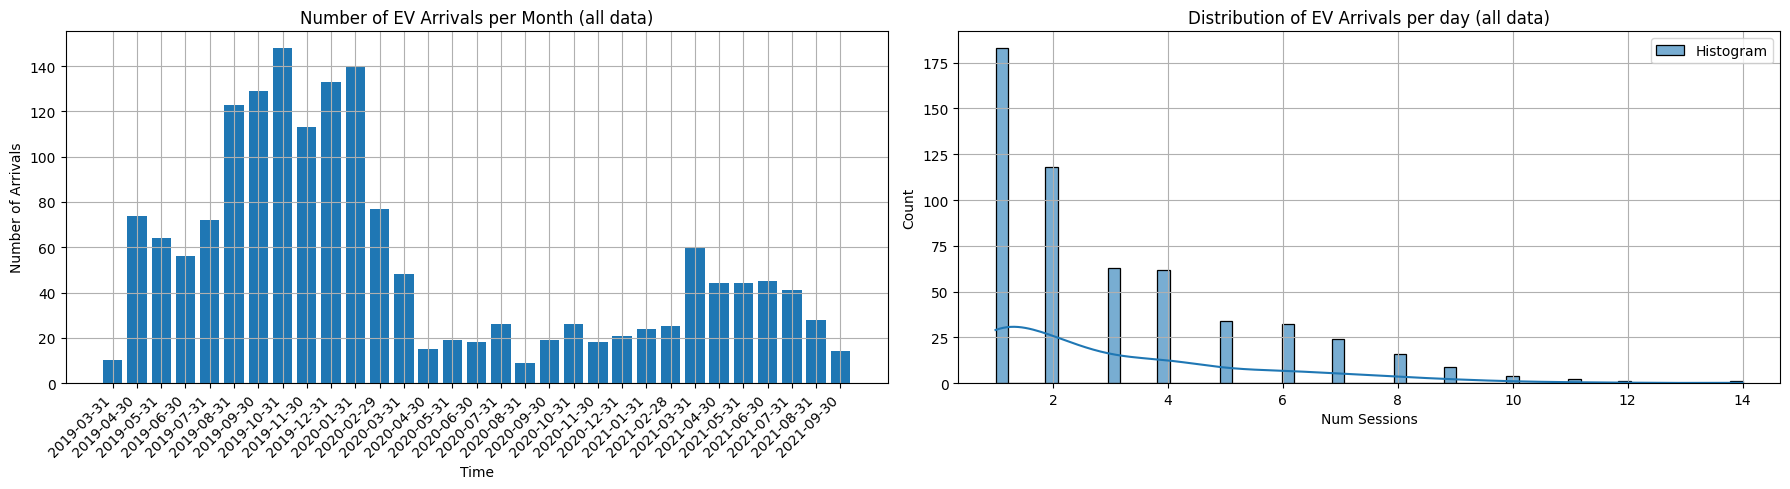

2025-08-04 15:37:57,325 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:37:57,327 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


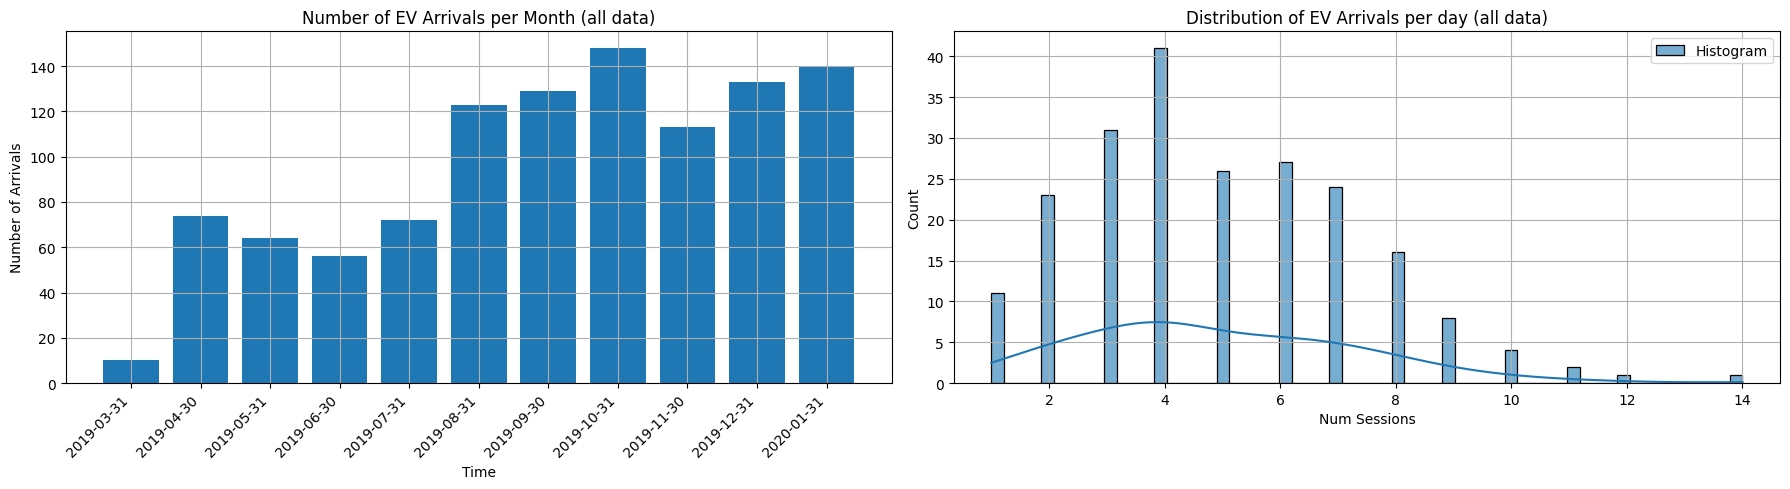

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
plotter.set_strategy(PlotNumberOfSessions(frequency='ME', max_xticks= 20))
fig = plotter.plot(df_original, ax= axs[0])
fig.axes[0].set_title("Number of EV Arrivals per Month (all data)")

plotter.set_strategy(PlotNumericalDistribution(kde=True))
plotter.plot(get_daily_session_stats(df_original), column="num_sessions", bins=60, ax=axs[1])
fig.axes[1].set_title("Distribution of EV Arrivals per day (all data)")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
plotter.set_strategy(PlotNumberOfSessions(frequency='ME', max_xticks= 20))
fig = plotter.plot(df_cleaned, ax= axs[0])
fig.axes[0].set_title("Number of EV Arrivals per Month (all data)")

plotter.set_strategy(PlotNumericalDistribution(kde=True))
plotter.plot(get_daily_session_stats(df_cleaned), column="num_sessions", bins=60, ax=axs[1])
fig.axes[1].set_title("Distribution of EV Arrivals per day (all data)")
plt.show()

### EV Arrival Patterns After Data Cleaning

The figure above compares the distribution of EV charging sessions **before and after applying data-cleaning steps** (removing post–February 2020 data):

1. **Number of EV Arrivals per Month (left)**  
   - Monthly activity is **very low**, starting at fewer than 20 arrivals and reaching a peak of only ~150 arrivals per month, highlighting **limited overall activity**.  

2. **Distribution of EV Arrivals per Day (right)**  
   - Most days see only **2–6 arrivals**, with a peak around 4 arrivals per day. 

In summary, this dataset reflects **a small-scale charging operation** with very few sessions, which is important to keep in mind when interpreting patterns or building models. The limited data volume makes analysis challenging.


In [28]:
# Number of unique users
unique_users = df_cleaned['EV_id_x'].nunique()

# Session counts per user
sessions_per_user = df_cleaned['EV_id_x'].value_counts()

print(f"Unique users: {unique_users}")

mask = sessions_per_user == 1
only_one = mask.sum()
percentage_only_one = (only_one / unique_users) * 100
print(f"Users with only one sessions: {only_one} ({percentage_only_one:.1f}%) of the users account for {100*sessions_per_user.loc[mask].sum()/sessions_per_user.sum():.1f}% of all sessions.")



Unique users: 1062
Users with only one sessions: 1062 (100.0%) of the users account for 100.0% of all sessions.


### User Activity Distribution (All Users)

- **all users** are one-time users. As a result, **user-level analysis in this dataset is not possible**

### Exploring Dataset Distributions

In the following sections, we present key **categorical** and **numerical** distributions related to the dataset.  
These visualizations help uncover patterns in usage behavior, session characteristics, and other important features of the EV charging data.

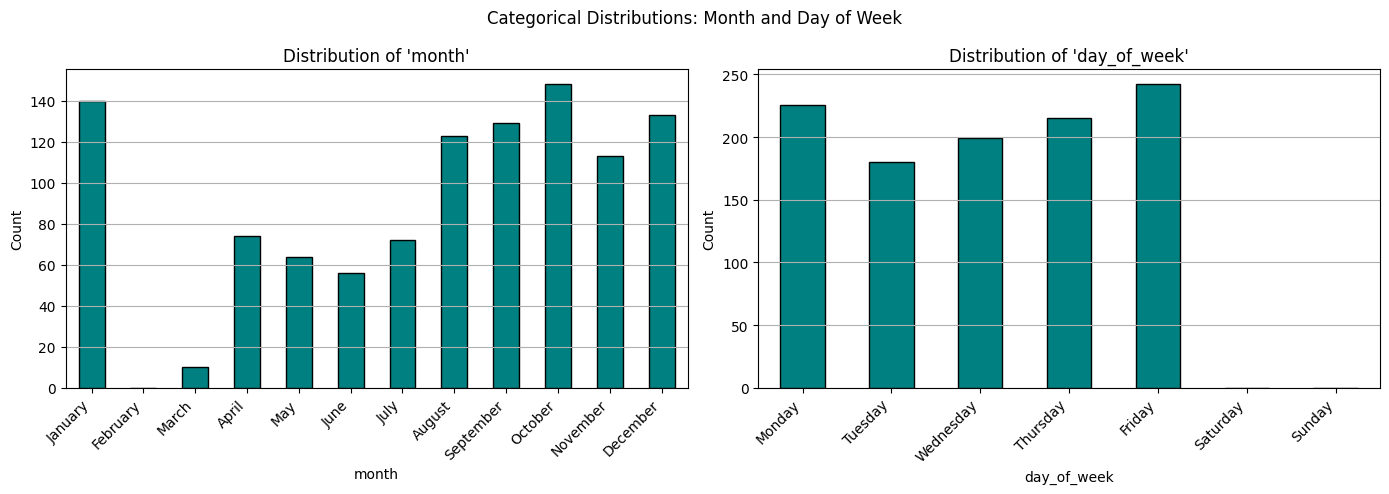

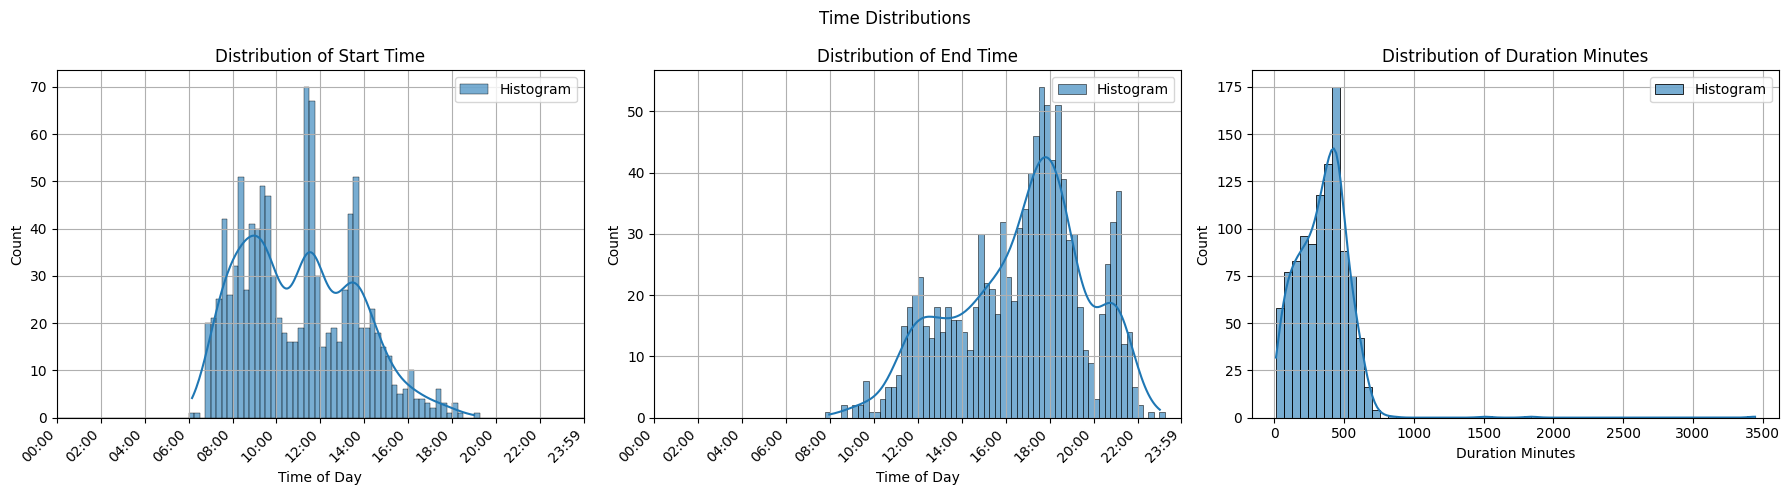

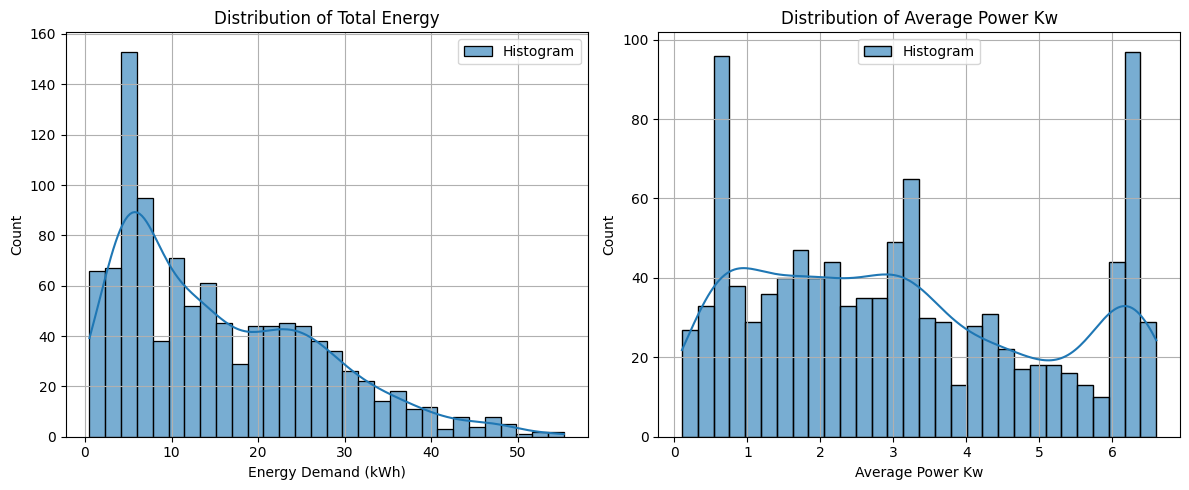

In [29]:
plot_univariate_plots(plotter, df_cleaned)

### Bivariate Analysis

Next, we explore **bivariate relationships** within the dataset to better understand how variables interact with each other.  
This includes visualizations such as **correlation heatmaps**, and **2D histograms** to examine joint distributions of key variables.  

**Note:** Some EVs **stay connected overnight**, which leads to patterns that may initially appear unusual. However, these behaviors are valid.


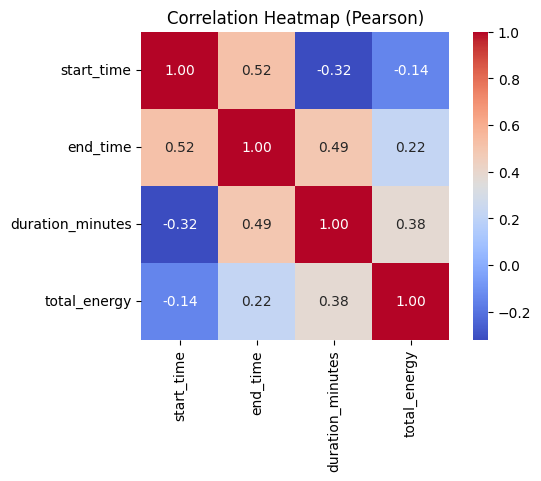

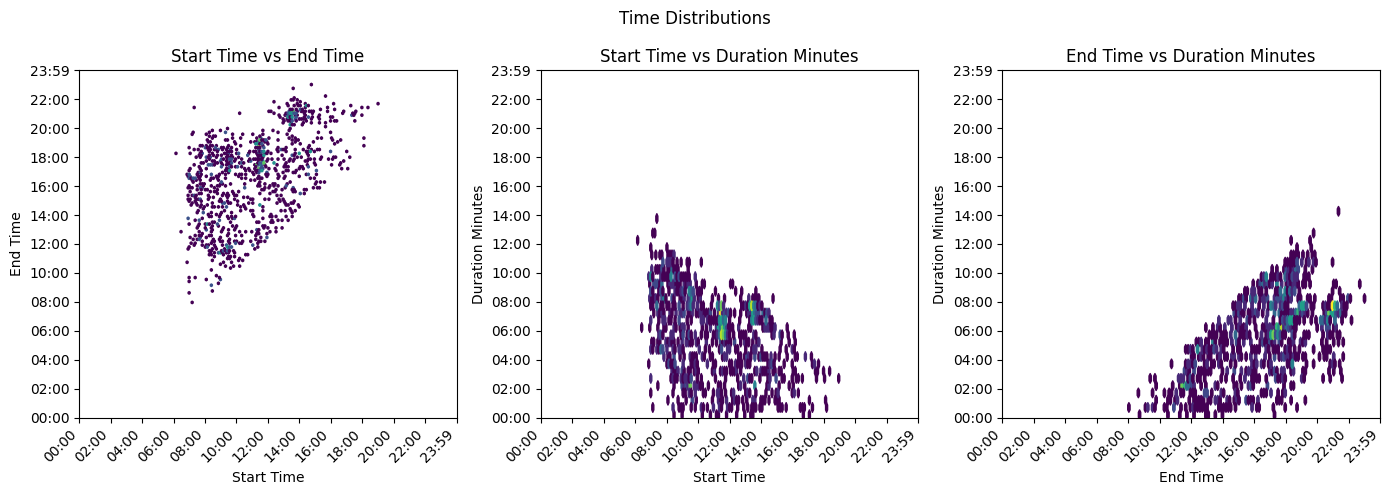

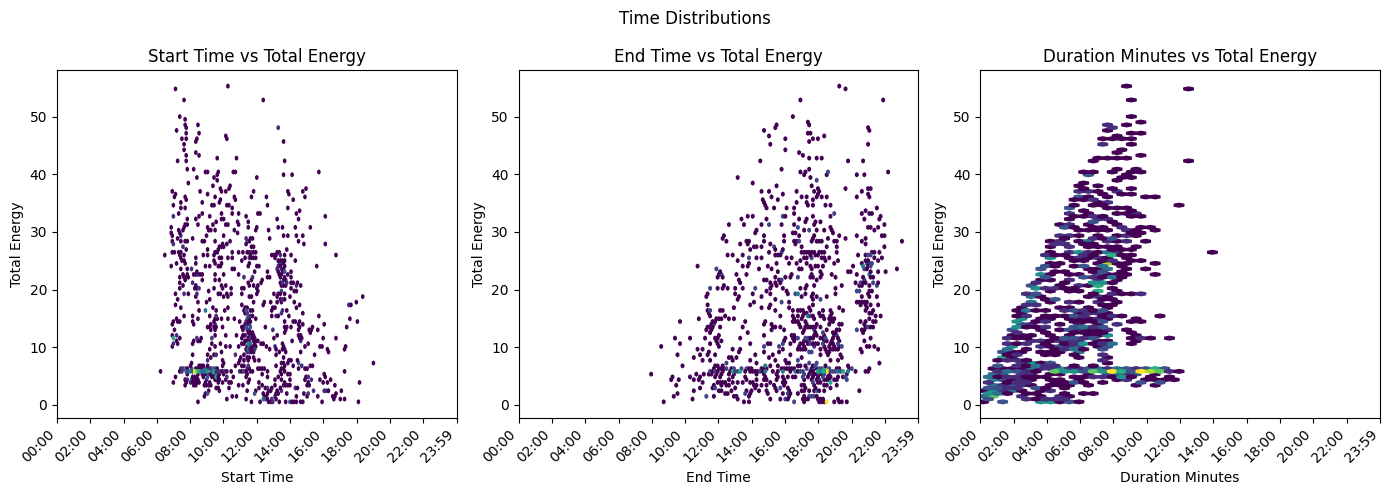

2025-08-04 15:38:00,028 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:38:00,030 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:38:00,111 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:38:00,121 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:38:00,

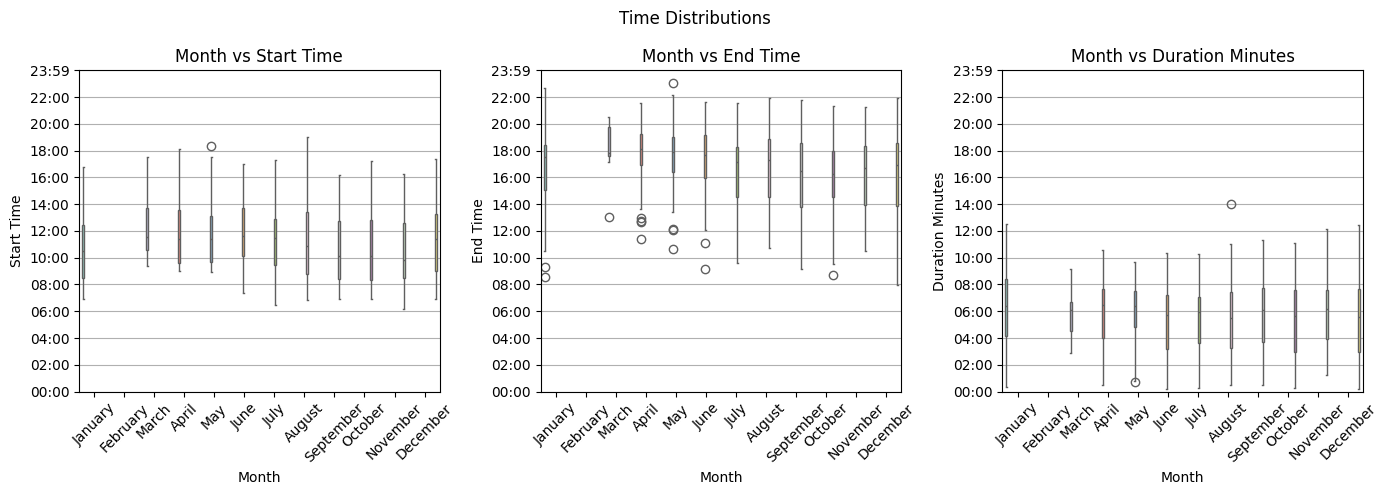

2025-08-04 15:38:00,604 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:38:00,608 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:38:00,656 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:38:00,661 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:38:00,

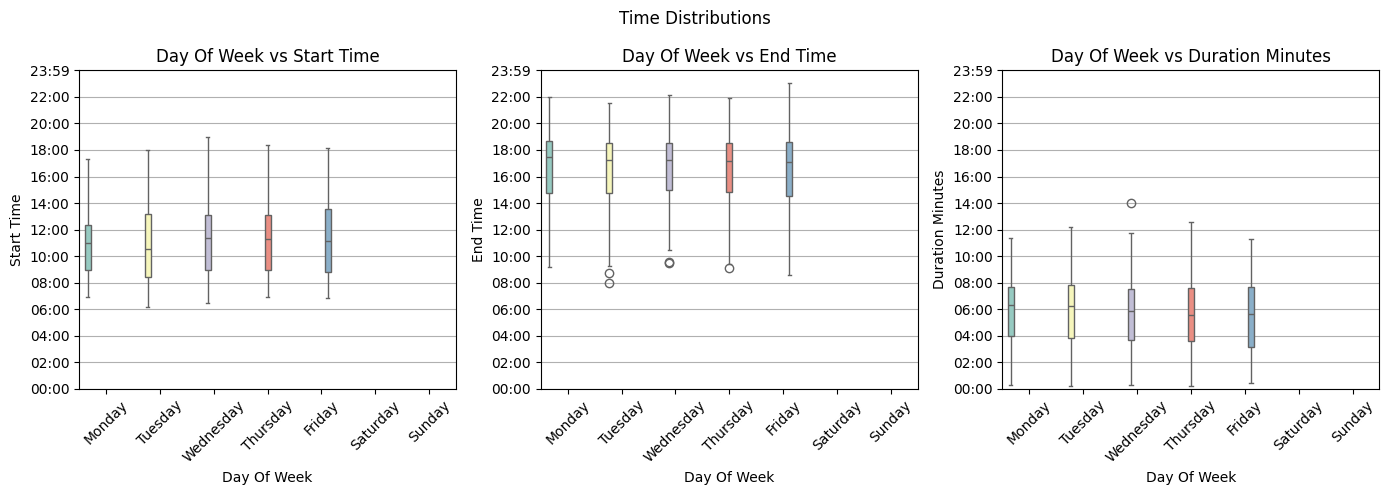

In [30]:
plot_bivariate_plots(plotter, df_cleaned)